<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#**DBSCAN**

In [109]:
#Librería DBSCAN
from sklearn.cluster import DBSCAN

#Librería para estandarizar
from sklearn.preprocessing import StandardScaler

#Librerías para crear datasets ficticios
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [110]:
#Creamos un dataset ficticio
centers = [[0, 0], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.2, random_state=0)

In [111]:
#Normalizamos las distancias de los datos
X = StandardScaler().fit_transform(X)

In [126]:
#Generamos el modelo, indicando el epsilon y el min_samples:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)

In [127]:
#Máscara con tamaño de los datos:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#Máscara con valores:
core_samples_mask[db.core_sample_indices_] = True
#Etiqueta de los datos (a qué cluster pertenecen):
labels = db.labels_

In [128]:
# Número de clusters en las etiquetas ignorando el ruido presente
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
ruido = list(labels).count(-1)
print("Estimado número de cluster: ", num_clusters)
print("Estimado número de puntos ruidosos: ", ruido)

Estimado número de cluster:  3
Estimado número de puntos ruidosos:  35


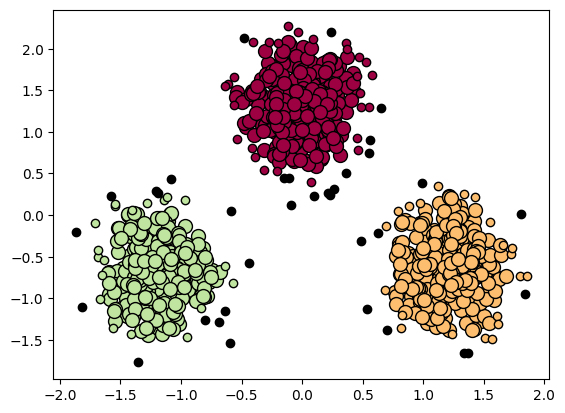

In [132]:
# Graficamos

#Clusters:
unique_labels = set(db.labels_)

#Variar el color de cada cluster:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):

#Asignamos el color negro para el ruido:
    if k == -1:
        #Ruido: color negro
        col = [0, 0, 0, 1]

    class_member_mask = db.labels_ == k

# Graficar puntos núcleo
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

# Graficar puntos de borde (y ruido si k == -1)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.show()

In [133]:
#Creamos otro dataset ficticio
X, y = make_moons(600, noise=0.1, random_state=0)

In [134]:
#Generamos el modelo, indicando el epsilon y el min_samples:
db = DBSCAN(eps=0.1, min_samples=10).fit(X)

In [135]:
#Máscara con tamaño de los datos:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#Máscara con valores:
core_samples_mask[db.core_sample_indices_] = True
#Etiqueta de los datos (a qué cluster pertenecen):
labels = db.labels_

In [136]:
# Número de clusters en las etiquetas ignorando el ruido presente
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
ruido = list(labels).count(-1)
print("Estimado número de cluster: ", num_clusters)
print("Estimado número de puntos ruidosos: ", ruido)

Estimado número de cluster:  12
Estimado número de puntos ruidosos:  128


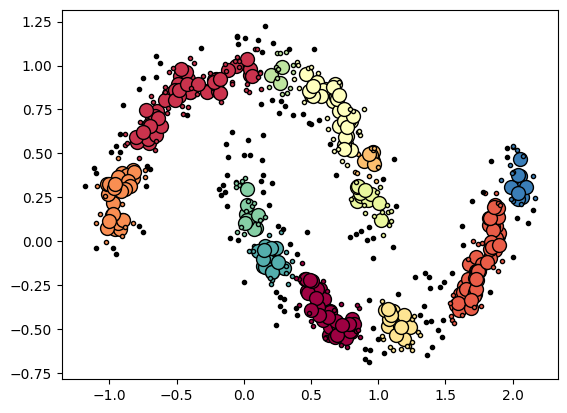

In [139]:
# Graficamos

#Clusters:
unique_labels = set(db.labels_)

#Variar el color de cada cluster:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):

#Asignamos el color negro para el ruido:
    if k == -1:
        #Ruido: color negro
        col = [0, 0, 0, 1]

    class_member_mask = db.labels_ == k

# Graficar puntos núcleo
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

# Graficar puntos de borde (y ruido si k == -1)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=3,
    )

plt.show()

In [141]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


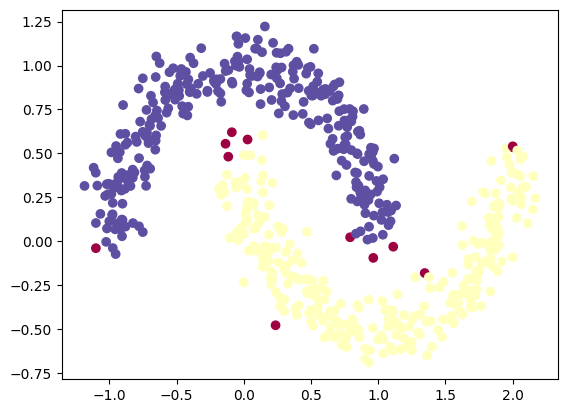

In [151]:
#HDBSCAN
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
cluster_labels = clusterer.fit_predict(X)

# Graficar los resultados
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='Spectral')
plt.show()